# Modelos de regresión lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una normal N(1.5, 2.5) [Normal(media, desv_est)]
* Ye = 5 + 1.9 * x + e
* e: estará distribuída sgún una N(0, 0.8)

In [33]:
import pandas as pd
import numpy as np

In [34]:
# Obtener x
x =  1.5 + 2.5 * np.random.randn(100)

In [35]:
res = 0.8 * np.random.randn(100)

In [114]:
a = 5

In [115]:
b = 0.3

In [116]:
y_pred = a + b * x

In [117]:
y = a + b * x + res

In [118]:
x_lst = x.tolist()
y_pred_lst = y_pred.tolist()
y_lst = y.tolist()

In [119]:
data = pd.DataFrame(
{
    "x":x_lst,
    "y":y_lst,
    "y_pred":y_pred_lst
}
)

In [120]:
data.head()

,x,y,y_pred
0,4.673772,7.034871,6.402132
1,1.797187,6.602412,5.539156
2,1.259776,4.528597,5.377933
3,2.815803,7.044855,5.844741
4,2.230057,3.968952,5.669017


In [121]:
import matplotlib.pyplot as plt

In [122]:
y_mean = [np.mean(y) for i in range(1,len(x_lst) + 1)]

Text(0.5,1,'Valor actual  vs Predicción')

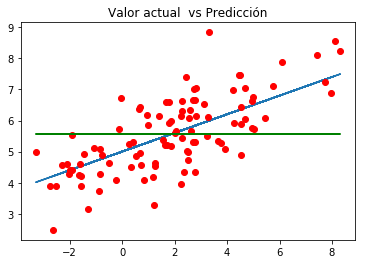

In [123]:
%matplotlib inline
plt.plot(data["x"],data["y_pred"])
plt.plot(data["x"],data["y"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.title("Valor actual  vs Predicción")

#### Incorporar al data frame:
* SSR (suma de los cuadrados de la regresión)
* SSD (suma de los cuadrados de la diferencia)
* SST (suma de los cuadrados totales)

In [124]:
data["SSR"] = (data["y_pred"] - np.mean(y))**2
data["SSD"] = (data["y_pred"] - data["y"])**2
data["SST"] = (data["y"] - np.mean(y))**2

In [125]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,4.673772,7.034871,6.402132,0.672106,0.400359,2.109931
1,1.797187,6.602412,5.539156,0.001862,1.130513,1.040606
2,1.259776,4.528597,5.377933,0.041770,0.721371,1.110312
3,2.815803,7.044855,5.844741,0.068870,1.440274,2.139036
4,2.230057,3.968952,5.669017,0.007518,2.890220,2.602926


In [126]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [127]:
SSR

61.31074486229991

In [128]:
SSD

72.50503982835113

In [129]:
SST

147.96244413200017

In [130]:
SSR + SSD

133.81578469065104

In [131]:
R2 = SSR/SST

In [132]:
R2

0.41436693765076904

(array([ 1.,  0.,  2., 14., 16., 21., 22., 14.,  7.,  3.]),
 array([-2.8411579 , -2.35022227, -1.85928665, -1.36835103, -0.8774154 ,
        -0.38647978,  0.10445585,  0.59539147,  1.08632709,  1.57726272,
         2.06819834]),
 <a list of 10 Patch objects>)

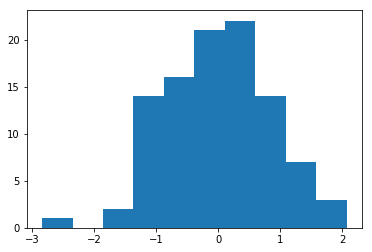

In [133]:
plt.hist(data["y_pred"] - data["y"])

### Obteniendo la recta de regresión
* y = a + b * x
* b = sum((xi - x_m) * (yi - y_m)) / sum((xi - x_m)"2)
* a = y_m - b * x_m

In [134]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y"])
x_mean, y_mean

(1.8850478815461957, 5.582310785184846)

In [135]:
data["beta_n"] = (data["x"] - x_mean) * (data["y"] - y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [136]:
beta = sum(data["beta_n"]) / sum(data["beta_d"])

In [137]:
alpha = y_mean - beta * x_mean

In [138]:
alpha, beta

(4.951263492340436, 0.334764596179275)

#### El modelo lineal obtenido por regresión es: y = 4.951263492340434 + 1.9347645961792743 * x

In [139]:
data["y_model"] = alpha + beta * data["x"]

In [140]:
data.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,4.673772,7.034871,6.402132,0.672106,0.400359,2.109931,4.050789,7.776983,6.515877
1,1.797187,6.602412,5.539156,0.001862,1.130513,1.040606,-0.089627,0.007719,5.552898
2,1.259776,4.528597,5.377933,0.041770,0.721371,1.110312,0.658857,0.390965,5.372992
3,2.815803,7.044855,5.844741,0.068870,1.440274,2.139036,1.361270,0.866305,5.893895
4,2.230057,3.968952,5.669017,0.007518,2.890220,2.602926,-0.556623,0.119031,5.697808


In [141]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y"])**2)
SST = sum((data["y"] - y_mean)**2)

In [142]:
SSR, SSD, SST

(76.30855704287632, 71.65388708912396, 147.96244413200017)

In [143]:
R2 = SSR / SST
R2

0.515729227714027

Text(0.5,1,'Valor actual  vs Predicción')

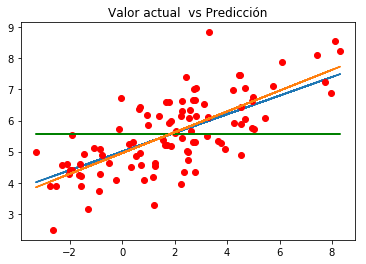

In [144]:
y_mean = [np.mean(y) for i in range(1,len(x_lst) + 1)]
%matplotlib inline
plt.plot(data["x"],data["y_pred"])
plt.plot(data["x"],data["y"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"],data["y_model"])
plt.title("Valor actual  vs Predicción")

## Error estándar de los residuos (RSE)

In [146]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8550801793716927

In [147]:
ym = np.mean(data["y"])
ym

5.582310785184846

In [148]:
RSE / ym

0.1531767420834092

In [149]:
# Se tiene un error del 15% por lo que no se recomienda el uso de este modelo.